In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading ipl matches dataset
df = pd.read_csv("/content/drive/MyDrive/ML_Projects/IPL_Matches_DataVisualization/IPL Matches 2008-2020.csv")

In [ ]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
#shape of dataset
df.shape

(816, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
#statistical summary of dataset
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [ ]:
#columns of dataset
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
#Checking missing values in dataset
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
#drop the 'method' feature
df.drop('method', axis = 1, inplace = True)

In [ ]:
#Let's see the most wins in IPL match
df['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

* Most number of winners in IPL matches are Mumbai Indians and Chennai Super Kings.

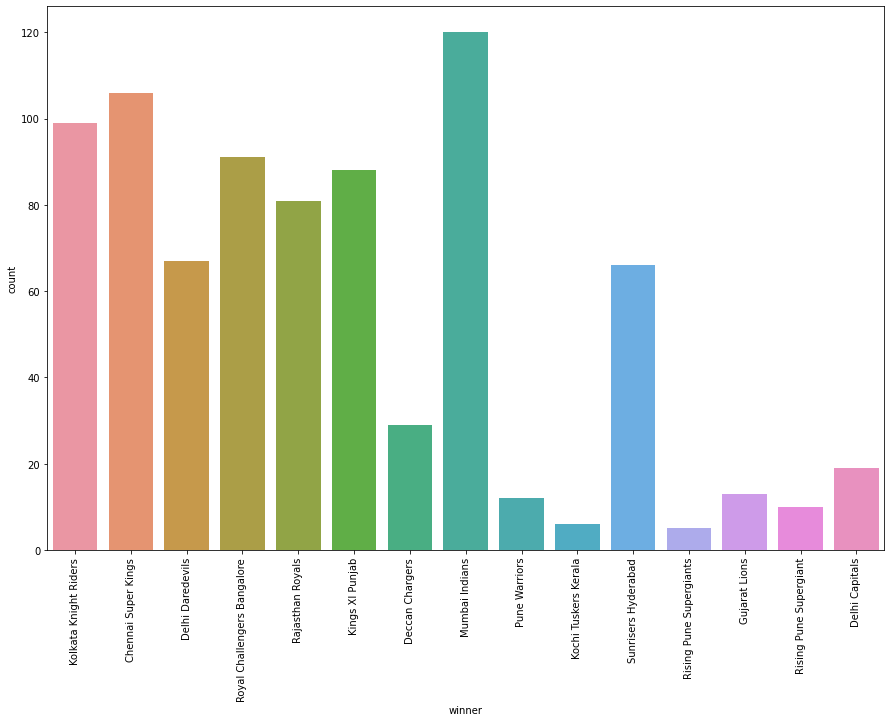

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df['winner'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Let's see the most wins in eliminator
df['eliminator'].value_counts()

N    799
Y     13
Name: eliminator, dtype: int64

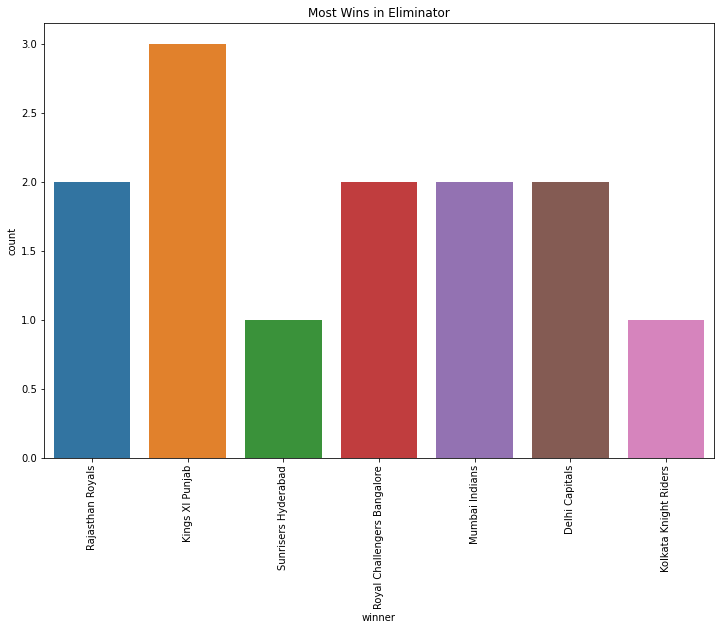

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(df['winner'][df['eliminator'] == 'Y'], data = df)
plt.title("Most Wins in Eliminator", fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

* From the plot we can say that most eliminator winner is Kings XI Punjab.

In [ ]:
#Toss Decision
df['toss_winner'].value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Rajasthan Royals                87
Royal Challengers Bangalore     87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Delhi Capitals                  20
Pune Warriors                   20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

In [ ]:
df['toss_decision'].value_counts()

field    496
bat      320
Name: toss_decision, dtype: int64

In [ ]:
teams = df['toss_winner'].unique()
decision_making = pd.DataFrame([], columns = ['Toss Winner', 'Decision', 'Times'])

for id, element in enumerate(teams):
  temp_bat = df[(df['toss_winner'] == element) & (df['toss_decision'] == 'bat')]
  temp_field = df[(df['toss_winner'] == element) & (df['toss_decision'] == 'field')]  

  #now we append both variable in dataframe decision_making
  decision_making = decision_making.append({"Toss Winner": element, "Decision": 'bat', "Times": temp_bat['toss_winner'].count()}, ignore_index = True)
  decision_making = decision_making.append({"Toss Winner": element, "Decision": 'fields', "Times": temp_bat['toss_winner'].count()}, ignore_index = True)

In [ ]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,fields,24
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,fields,51
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,fields,34
6,Mumbai Indians,bat,48
7,Mumbai Indians,fields,48
8,Deccan Chargers,bat,24
9,Deccan Chargers,fields,24


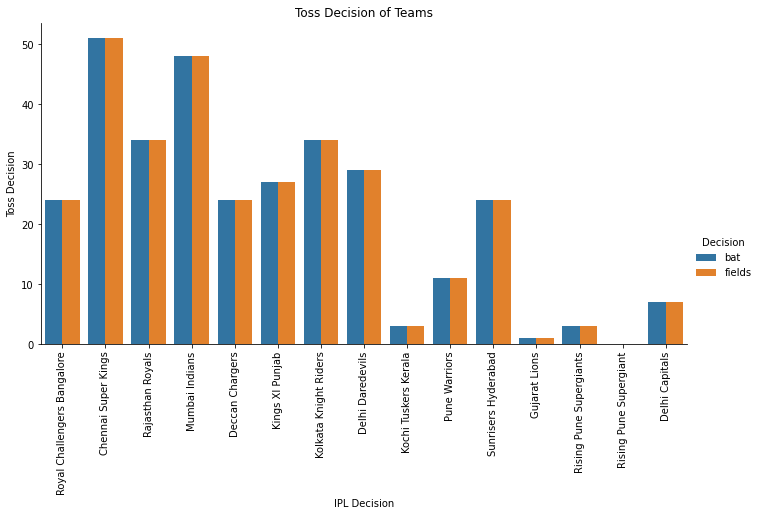

In [ ]:
sns.catplot(x = 'Toss Winner', y = 'Times', hue = 'Decision', data = decision_making, kind ='bar', height= 5, aspect= 2)
plt.xticks(rotation = 90)
plt.title("Toss Decision of Teams")
plt.xlabel('IPL Decision')
plt.ylabel("Toss Decision")
plt.show()

### Famous Venue

In [ ]:
df['venue'].value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                                   

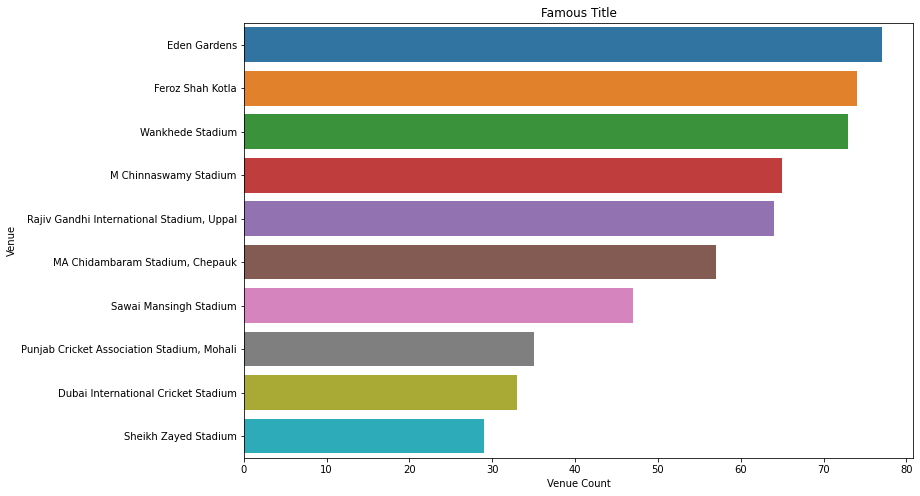

In [ ]:
#Here we visualize the top 10 venues
plt.figure(figsize = (12,8))
sns.barplot(df['venue'].value_counts().head(10).values, y = df['venue'].value_counts().head(10).index, data = df)
plt.title("Famous Title")
plt.xlabel('Venue Count')
plt.ylabel("Venue")
plt.show()

* From the above plot we observe that most famous venue for IPL mathes are 'Eden Gardens', 'Feroz Shah Kotla', 'Wankhede Stadium'

In [ ]:
df['umpire1'].value_counts()

HDPK Dharmasena          78
AK Chaudhary             56
Asad Rauf                51
M Erasmus                40
Aleem Dar                38
BF Bowden                37
S Ravi                   37
CB Gaffaney              34
BR Doctrove              34
KN Ananthapadmanabhan    33
AY Dandekar              28
C Shamshuddin            22
NJ Llong                 21
RE Koertzen              20
Nitin Menon              20
VA Kulkarni              19
S Asnani                 19
BNJ Oxenford             16
JD Cloete                16
YC Barde                 14
A Nand Kishore           14
RK Illingworth           13
BG Jerling               13
SS Hazare                11
K Hariharan              10
S Das                    10
MR Benson                10
DJ Harper                 9
CK Nandan                 8
UV Gandhe                 8
IL Howell                 7
RM Deshpande              7
GAV Baxter                7
VK Sharma                 6
SJ Davis                  6
RJ Tucker           

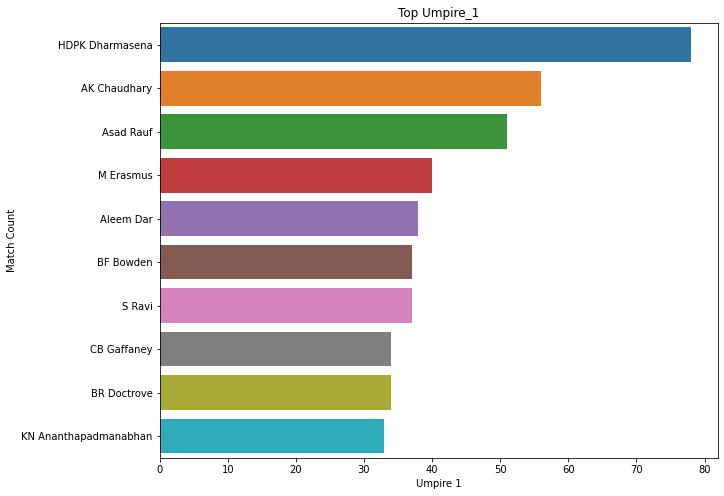

In [ ]:
#Let's see the Top 5 Umpire_1
plt.figure(figsize = (10,8))
sns.barplot(x = df['umpire1'].value_counts().head(10).values,
            y = df['umpire1'].value_counts().head(10).index, data = df)
plt.xlabel("Umpire 1")
plt.ylabel("Match Count")
plt.title("Top Umpire_1")
plt.show()

* From the above plot we can say that top umpire 1 is 'HDPK Dharmasena', 'AK Chaudhary'.

In [ ]:
#Let's see the Top 5 Umpire_2
df['umpire2'].value_counts()

S Ravi             84
C Shamshuddin      60
SJA Taufel         54
CK Nandan          49
RJ Tucker          41
Nitin Menon        37
BNJ Oxenford       32
VA Kulkarni        31
AK Chaudhary       31
RB Tiffin          30
SK Tarapore        26
M Erasmus          25
AM Saheba          23
RE Koertzen        21
VK Sharma          20
PR Reiffel         19
DJ Harper          18
RK Illingworth     18
HDPK Dharmasena    16
NJ Llong           16
SL Shastri         13
CB Gaffaney        13
K Srinath          13
S Asnani           11
A Nand Kishore     11
K Hariharan        11
BR Doctrove         8
A Deshmukh          7
IL Howell           7
PG Pathak           7
K Srinivasan        6
SS Hazare           6
I Shivram           6
AL Hill             6
GA Pratapkumar      6
YC Barde            5
S Das               5
TH Wijewardene      5
BG Jerling          4
AV Jayaprakash      4
IJ Gould            3
MR Benson           2
SD Ranade           2
JD Cloete           1
Subroto Das         1
SD Fry    

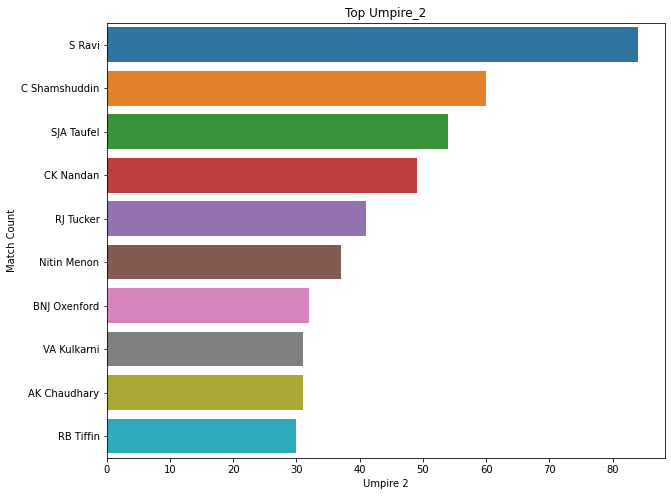

In [ ]:
#Let's see the Top 5 Umpire_1
plt.figure(figsize = (10,8))
sns.barplot(x = df['umpire2'].value_counts().head(10).values,
            y = df['umpire2'].value_counts().head(10).index, data = df)
plt.xlabel("Umpire 2")
plt.ylabel("Match Count")
plt.title("Top Umpire_2")
plt.show()

* From the above plot we can say that top umpire 2 is 'S Ravi', 'C Shamshuddin'.